In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.ion()

## EWMA

In [2]:
pd.options.display.float_format = '{:.5f}'.format
df = pd.DataFrame()
df['t'] = np.arange(10)
for alpha in np.linspace(0, 1, 10):
    alpha = round(alpha, 2)
    df[f'alpha={alpha}'] = list(reversed([(1 - alpha)**i for i in range(10)]))
df    

,t,alpha=0.0,alpha=0.11,alpha=0.22,alpha=0.33,alpha=0.44,alpha=0.56,alpha=0.67,alpha=0.78,alpha=0.89,alpha=1.0
0,0,1.00000,0.35036,0.10687,0.02721,0.00542,0.00062,0.00005,0.00000,0.00000,0.00000
1,1,1.00000,0.39366,0.13701,0.04061,0.00967,0.00140,0.00014,0.00001,0.00000,0.00000
2,2,1.00000,0.44231,0.17566,0.06061,0.01727,0.00319,0.00043,0.00002,0.00000,0.00000
3,3,1.00000,0.49698,0.22520,0.09046,0.03084,0.00726,0.00129,0.00011,0.00000,0.00000
4,4,1.00000,0.55841,0.28872,0.13501,0.05507,0.01649,0.00391,0.00052,0.00002,0.00000
5,5,1.00000,0.62742,0.37015,0.20151,0.09834,0.03748,0.01186,0.00234,0.00015,0.00000
6,6,1.00000,0.70497,0.47455,0.30076,0.17562,0.08518,0.03594,0.01065,0.00133,0.00000
7,7,1.00000,0.79210,0.60840,0.44890,0.31360,0.19360,0.10890,0.04840,0.01210,0.00000
8,8,1.00000,0.89000,0.78000,0.67000,0.56000,0.44000,0.33000,0.22000,0.11000,0.00000
9,9,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


In [3]:
df = pd.DataFrame()
df['x'] = np.arange(10)
df['ewm(alpha=1)'] = df.x.ewm(alpha=1).mean()
df['ewm(alpha=0)'] = df.x.ewm(alpha=.0000001).mean()
df['ewm(alpha=.8)'] = df.x.ewm(alpha=.8).mean()
df['ewm(alpha=.5)'] = df.x.ewm(alpha=.5).mean()
df['ewm(alpha=.1)'] = df.x.ewm(alpha=.1).mean()
df

,x,ewm(alpha=1),ewm(alpha=0),ewm(alpha=.8),ewm(alpha=.5),ewm(alpha=.1)
0,0,0.00000,0.00000,0.00000,0.00000,0.00000
1,1,1.00000,0.50000,0.83333,0.66667,0.52632
2,2,2.00000,1.00000,1.77419,1.42857,1.07011
3,3,3.00000,1.50000,2.75641,2.26667,1.63129
4,4,4.00000,2.00000,3.75160,3.16129,2.20971
5,5,5.00000,2.50000,4.75038,4.09524,2.80522
6,6,6.00000,3.00000,5.75009,5.05512,3.41759
7,7,7.00000,3.50000,6.75002,6.03137,4.04660
8,8,8.00000,4.00000,7.75000,7.01761,4.69197
9,9,9.00000,4.50000,8.75000,8.00978,5.35340


## Bollinger Bands

In [4]:
# Data + Prep from TS: explore lesson
plt.rc('figure', figsize=(13, 6))
plt.rc('axes.spines', top=False, right=False)
plt.rc('font', size=13)

# T(°F) = T(K) × 9/5 - 459.67
def to_fahrenheit(k):
    return k * 9/5 - 459.67

url = "https://gist.githubusercontent.com/ryanorsinger/0ec766c66f4089bdcbc1d4fb294a3394/raw/197c1f0d7b55a45f29437811bc73d9c4ef8af647/sa_temps.csv"
s = pd.read_csv(url, index_col='datetime', parse_dates=True).temp
s = s.dropna()
s = to_fahrenheit(s)
s = s.resample('D').mean()

Text(0.5, 0, '')

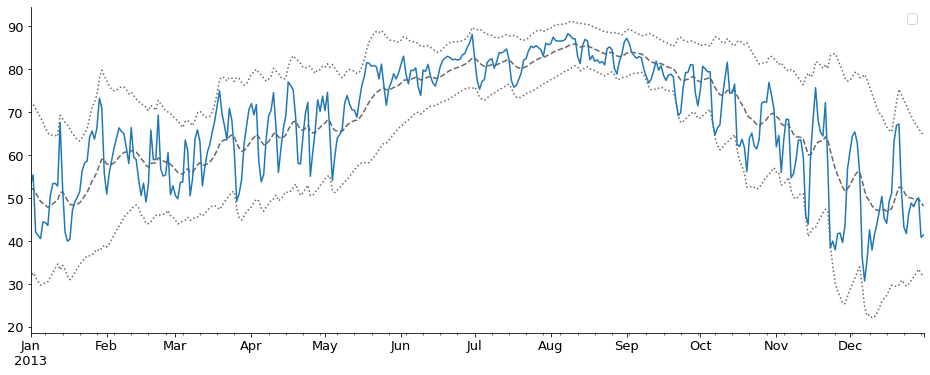

In [16]:
K = 2
N = 20
# std = s.rolling(N).std()
std = s.ewm(alpha=.1).std()
bands = pd.DataFrame()
# bands['mid'] = s.rolling(N).mean()
bands['mid'] = s.ewm(alpha=.1).mean()
bands['upper'] = bands['mid'] + K * std
bands['lower'] = bands['mid'] - K * std
bands['actual'] = s

t = bands.loc['2013']
t[['upper', 'lower']].plot(color='black', alpha=.6, ls=':', figsize=(16, 6))
t.mid.plot(color='black', alpha=.6, ls='--')
t.actual.plot()
plt.legend('')
plt.xlabel('')

In [17]:
bands['%b'] = (bands.actual - bands.lower) / (bands.upper - bands.lower)

In [21]:
upper_outliers = bands[bands['%b'] > 1]

In [22]:
lower_outliers = bands[bands['%b'] < 0]

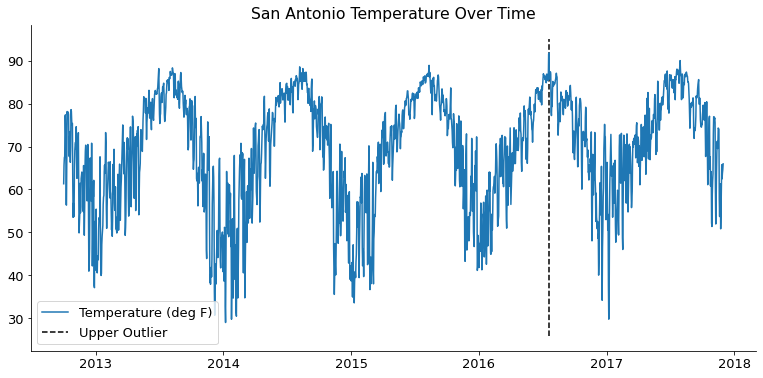

In [26]:
plt.plot(bands.index, bands.actual, label='Temperature (deg F)')
plt.vlines(upper_outliers.index, *plt.ylim(), color='black', ls='--', label='Upper Outlier')
plt.title('San Antonio Temperature Over Time')
plt.legend()

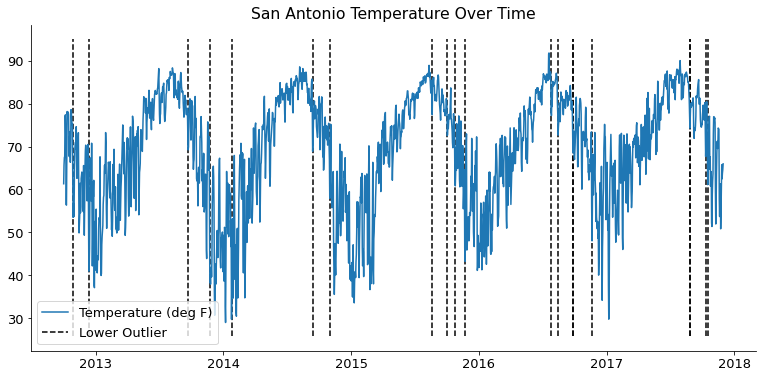

In [27]:
plt.plot(bands.index, bands.actual, label='Temperature (deg F)')
plt.vlines(lower_outliers.index, *plt.ylim(), color='black', ls='--', label='Lower Outlier')
plt.title('San Antonio Temperature Over Time')
plt.legend()

(15706.0, 16071.0)

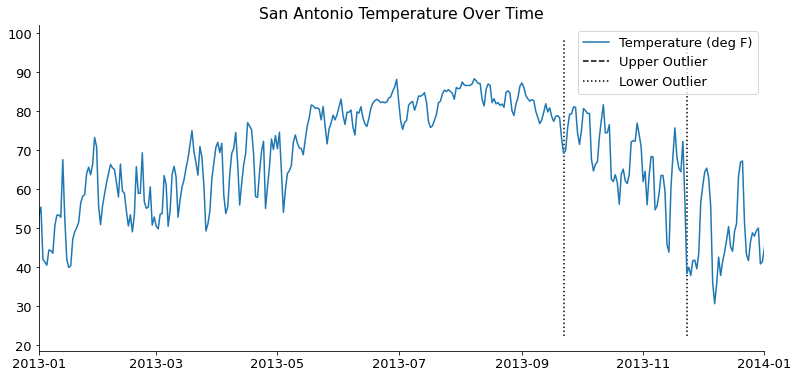

In [29]:
plt.plot(bands.index, bands.actual, label='Temperature (deg F)')
plt.vlines(upper_outliers.index, *plt.ylim(), color='black', ls='--', label='Upper Outlier')
plt.vlines(lower_outliers.index, *plt.ylim(), color='black', ls=':', label='Lower Outlier')
plt.title('San Antonio Temperature Over Time')
plt.legend()
plt.xlim(pd.to_datetime('2013'), pd.to_datetime('2014'))

How do we deal with "dense" data? Use less data points:

- consider a broader resampling period
- use a subset of the data ("zoom in")
- change the threshold for outlier detection -- in this case, use a higher K value
- experiment and iterate

"If you torture the data enough it will confess to anything"

- Is this analysis reproducible with new data?
- If my worst enemy read this work, what would they criticize?
- State your hypothesis, biases, and assumptions ahead of time

## So how do we apply this to the project we are working on?

- data that is not uniformly frequent
- data that has lots of discrete features

A: We create a continuous variable from the discrete ones by resampling + .size().

In [30]:
import env

url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/curriculum_logs'
query = 'SELECT * FROM logs'

df = pd.read_sql(query, url)

In [31]:
df.head()

,date,time,path,user_id,cohort_id,ip
0,2018-01-26,09:55:03,/,1,8.00000,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.00000,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.00000,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.00000,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.00000,97.105.19.61


I'm choosing to focus on cohort_id

In [36]:
# subset
df = df[df.cohort_id.isin([33, 34, 51])]

In [45]:
df = df.set_index(pd.to_datetime(df.date + ' ' + df.time))

This is the **secret sauce**

1. groupby + resample + `.size()` gives us counts over time for each unique value of the discrete variable
1. `.unstack(0)` converts the index of the discrete variable to columns

We end up with a dataframe where the rows are our chosen time period, columns are unique values of the discrete var, and the values are the number of times that combination of discrete var + time period shows up (i.e. # of requests per cohort per week).

In [56]:
cohort_requests = df.groupby('cohort_id').resample('W').size().unstack(0)
cohort_requests.head()

cohort_id,33.00000,34.00000,51.00000
2019-07-21,2178.00000,NaN,NaN
2019-07-28,2023.00000,NaN,NaN
2019-08-04,2244.00000,NaN,NaN
2019-08-11,2008.00000,NaN,NaN
2019-08-18,2069.00000,NaN,NaN


<AxesSubplot:>

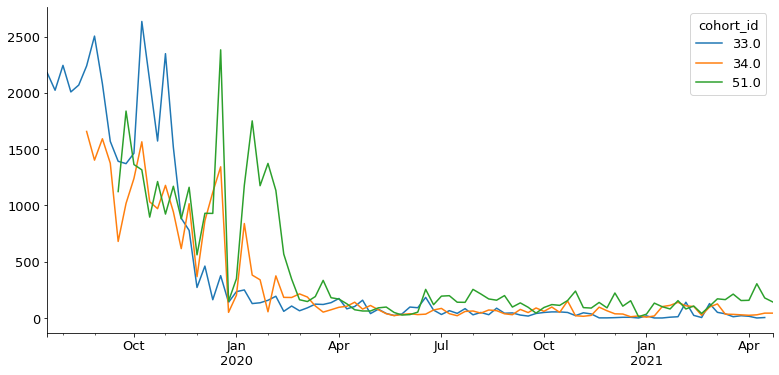

In [57]:
cohort_requests.plot()

In [64]:
K = 2
N = 5
s = cohort_requests.iloc[:, 0]
bands = pd.DataFrame()
std = s.rolling(N).std()
bands['actual'] = s
bands['mid'] = bands.actual.rolling(N).mean()
bands['upper'] = bands.mid + K * std
bands['lower'] = bands.mid - K * std
bands.head()

,actual,mid,upper,lower
2019-07-21,2178.00000,NaN,NaN,NaN
2019-07-28,2023.00000,NaN,NaN,NaN
2019-08-04,2244.00000,NaN,NaN,NaN
2019-08-11,2008.00000,NaN,NaN,NaN
2019-08-18,2069.00000,2104.40000,2309.52728,1899.27272


Text(0, 0.5, '# of requests')

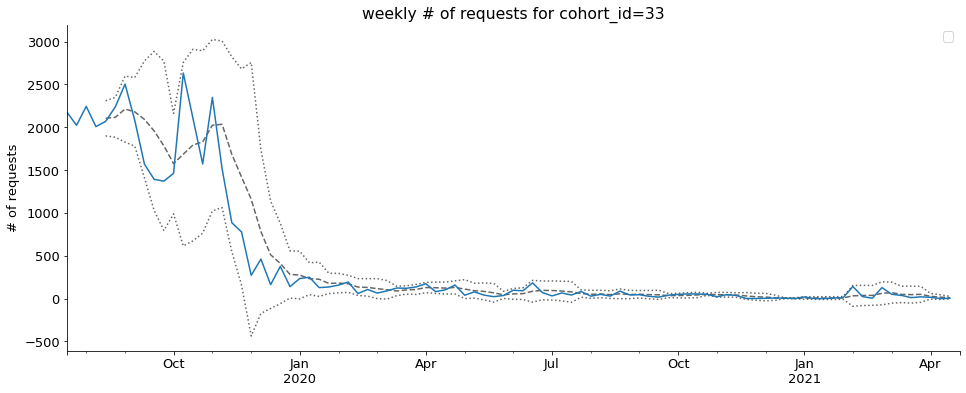

In [68]:
bands[['upper', 'lower']].plot(color='black', alpha=.6, ls=':', figsize=(16, 6))
bands.mid.plot(color='black', alpha=.6, ls='--')
bands.actual.plot()
plt.legend('')
plt.xlabel('')
plt.title('weekly # of requests for cohort_id=33')
plt.ylabel('# of requests')

Next steps:

1. Calculate %b to call out outliers and visualize
1. tweak hyperparams -- try a ewma, diff values for k
1. apply this to multiple cohorts or other discrete variables (a function might help!)